In [57]:
import numpy as np
import pandas as pd
from pathlib import Path
from natsort import natsorted
import matplotlib.pyplot as plt
plt.style.use('./graph_preset.mplstyle')

import h5py

import json

#from datetime import datetime, timedelta
#from glob import glob

### １．データの読み込み

In [67]:
run_dir = Path("../runs")
read_paths = natsorted(run_dir.glob("*.h5"))

for idx, read_path in enumerate(read_paths, start=0):
    run_name = Path(read_path).name   # e.g. 250526105004.h5
    print(f"{idx}: {run_name}")

0: 250526105004.h5
1: 250526105046.h5
2: 250526110605.h5
3: 250526110735.h5


### ２．データの選択

In [72]:
with h5py.File(read_paths[3], "r") as f: # read_paths[#] that you want to read
    arr = f["log"][:]


df_data = pd.DataFrame(arr, columns=["rel_time", "com", "vel"])
df_data

,rel_time,com,vel
0,0.124990,0.000000,0.097656
1,0.249990,0.000000,0.101562
2,0.374990,0.000000,0.097656
3,0.499990,0.000000,0.101562
4,0.624990,0.000000,0.097656
...,...,...,...
1071,133.999985,0.006111,0.101562
1072,134.124985,0.006250,0.097656
1073,134.249985,0.006250,0.101562
1074,134.374985,0.006250,0.097656


### ３．プロット

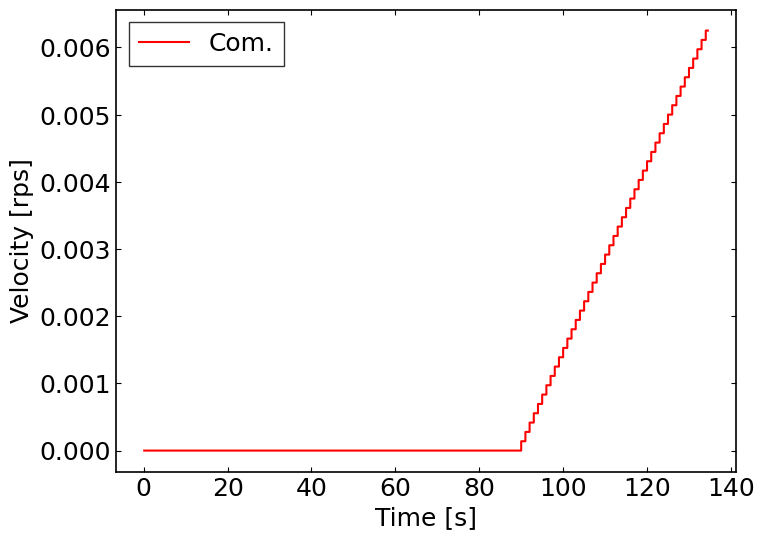

In [73]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(df_data["rel_time"], df_data["com"], label="Com.", color="red")
#ax.plot(df_data["rel_time"], df_data["vel"], label="Vel.", color="blue")

ax.set_xlabel("Time [s]")
ax.set_ylabel("Velocity [rps]")

ax.legend()

In [74]:
# hdf2csv
csv_path = read_paths[3].with_suffix(".csv")  # Change index as needed
df_data.to_csv(csv_path, index=False)
print(f"Data saved to {csv_path}")

Data saved to ..\runs\250526110735.csv
